# Create handler for LVC NR files -- SXS0057_Res5

In [1]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
# %matplotlib auto
%matplotlib inline
# Import useful things
#
# from os import system
# system('source ~/.virtual_enviroments/ringdownFD_nikhef/bin/activate')
from nrutils.core.basics import lalphenom
from nrutils import scsearch,gwylm,lvcnr5_to_gwylm
# Setup plotting backend
# import matplotlib as mpl
from mpl_toolkits.mplot3d import axes3d
# mpl.rcParams['lines.linewidth'] = 0.8
# mpl.rcParams['font.size'] = 18
# mpl.rcParams['axes.labelsize'] = 20
# mpl.rcParams['axes.titlesize'] = 20
# from matplotlib import rc
# rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
# rc('text', usetex=True)



from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import Axes3D
#
import corner
#
from numpy import *
from numpy.linalg import pinv
#
from nrutils.core.units import *
from positive.maths import lim
#
from scipy.optimize import minimize
from os.path import expanduser
#
import lal
from lal import MSUN_SI, PC_SI, C_SI, G_SI, MTSUN_SI
import lalsimulation as lalsim
alert('The LASIMULATION version is located at: %s'%( bold(yellow(lalsim.__path__[0])) ))
#
import review_ringdownFD_nikhef as review
from nrutils.analyze.match import match as match_object
from scipy.interpolate import InterpolatedUnivariateSpline as spline
#
import h5py
#
from glob import glob as find

(positive)>> Applying custom matplotlib settings.
(notebook)>> The LASIMULATION version is located at: /Users/book/.virtual_enviroments/phenomhm/opt/lalsuite/lib/python2.7/site-packages/lalsimulation


In [3]:
# Define path to h5 file
# h5dir = '/Users/book/MOUNT/lvcnr/SXS/SXS_BBH_0001_Res5.h5'
h5dir = '/Users/book/MOUNT/lvcnr/Cardiff-UIB/GW150914-followup/q1.2_base.h5'
# h5dir = '/Users/book/MOUNT/lvcnr/SXS/SXS_BBH_0063_Res5.h5'

# SXSID -- File Name 
# 63 -- d13.0_q8.0_s0_s0
# 151 -- d15_q1_sA_0_0_-0.6_sB_0_0_-0.6
# 65 -- d13.0_q8.0_s0_0_0.5_s0
# 01 -- d18.0_q1.0_s0_0_0_s0_0_0
# 64 -- d13.0_q8.0_s0_0_-0.5_s0
# 156 -- d15_q1_sA_0_0_-0.95_sB_0_0_-0.95
# 167 -- d13_q4_sA_0_0_0_sB_0_0_0
# 152 -- d15_q1_sA_0_0_0.6_sB_0_0_0.6
# 172 -- d15.4_q1.00_sA_0.000_0.000_0.980_sB_-0.000_-0.000_0.980

# sxsid = [ 63,151,65,1,64,156,167,152,172 ]
# sxs_catalog_dir = '/Users/book/MOUNT/lvcnr/SXS/'
# sxs_h5_path = []
# for k in sxsid:
#     fl = find( sxs_catalog_dir+'*%03i_Res*'%k )
#     hr_id = argmax([ int(f.split('_Res')[-1].split('.')[0]) for f in fl ])
#     sxs_h5_path.append( fl[hr_id] )
# print sxs_h5_path

# 
f = h5py.File( h5dir )

print f.attrs.keys()
print f.keys()
# print f['remnant-mass-vs-time'].keys()

# plot(f['remnant-mass-vs-time']['X'],f['remnant-mass-vs-time']['Y'])
# plot(f['LNhatz-vs-time']['X'],f['LNhatz-vs-time']['Y'],'.')
# xlim([-10,10])




[u'Omega', u'comparable-simulation', u'spin1x_lal', u'NR-code', u'point-of-contact-email', u'object1', u'object2', u'spin1y', u'spin1x', u'spin1z', u'coa_phase', u'modification-date', u'alternative-names', u'Format', u'LNhaty', u'LNhatx', u'LNhatz', u'spin2z_lal', u'spin1z_lal', u'mean_anomaly', u'spin2y_lal', u'type', u'spin1y_lal', u'INSPIRE-bibtex-keys', u'NR-group', u'spin2x', u'spin2y', u'Lmax', u'spin2x_lal', u'eccentricity', u'nhatz', u'simulation-type', u'nhatx', u'nhaty', u'mass1', u'name', u'license', u'mass2', u'NR-techniques', u'spin2z', u'eta', u'PN_approximant', u'f_lower_at_1MSUN', u'files-in-error-series', u'production-run']
[u'amp_l2_m-1', u'amp_l2_m-2', u'amp_l2_m0', u'amp_l2_m1', u'amp_l2_m2', u'amp_l3_m-1', u'amp_l3_m-2', u'amp_l3_m-3', u'amp_l3_m0', u'amp_l3_m1', u'amp_l3_m2', u'amp_l3_m3', u'amp_l4_m-1', u'amp_l4_m-2', u'amp_l4_m-3', u'amp_l4_m-4', u'amp_l4_m0', u'amp_l4_m1', u'amp_l4_m2', u'amp_l4_m3', u'amp_l4_m4', u'amp_l5_m-1', u'amp_l5_m-2', u'amp_l5_m-3', u'

In [4]:
# aa['Y'][0]
f.close()

In [8]:
?spline_diff

In [11]:
y = lvcnr5_to_gwylm(h5dir,lmax=3,clean=False)

(lvcnr5_to_gwylm!)>> NOTE that the L saved here (i.e. y.L) is the UNIT direction of L --- the interface may be updated in the future to use a PN L
(lvcnr5_to_gwylm)>> Loading strain for (l,m) = (2,-2)
(lvcnr5_to_gwylm)>> Loading strain for (l,m) = (2,-1)
(lvcnr5_to_gwylm)>> Loading strain for (l,m) = (2,0)
(lvcnr5_to_gwylm)>> Loading strain for (l,m) = (2,1)
(lvcnr5_to_gwylm)>> Loading strain for (l,m) = (2,2)
(lvcnr5_to_gwylm)>> Loading strain for (l,m) = (3,-3)
(lvcnr5_to_gwylm)>> Loading strain for (l,m) = (3,-2)
(lvcnr5_to_gwylm)>> Loading strain for (l,m) = (3,-1)
(lvcnr5_to_gwylm)>> Loading strain for (l,m) = (3,0)
(lvcnr5_to_gwylm)>> Loading strain for (l,m) = (3,1)
(lvcnr5_to_gwylm)>> Loading strain for (l,m) = (3,2)
(lvcnr5_to_gwylm)>> Loading strain for (l,m) = (3,3)


([<matplotlib.axes._subplots.AxesSubplot at 0x11974cd50>,
 <matplotlib.figure.Figure at 0x1190b3910>)

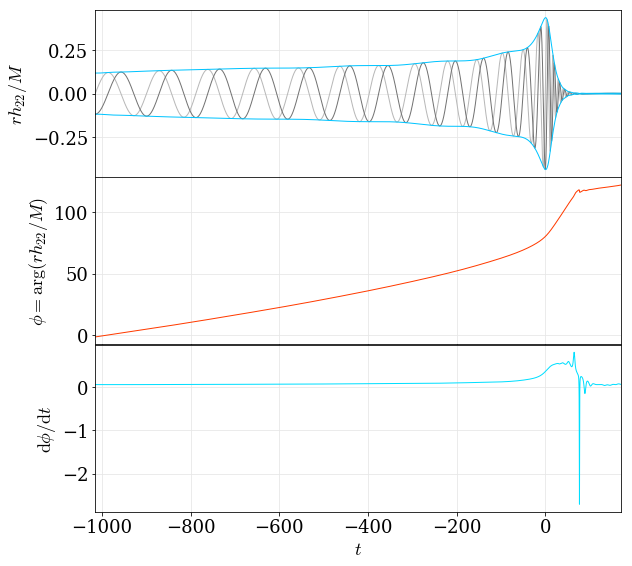

In [12]:
y.lm[2,2]['strain'].plot()

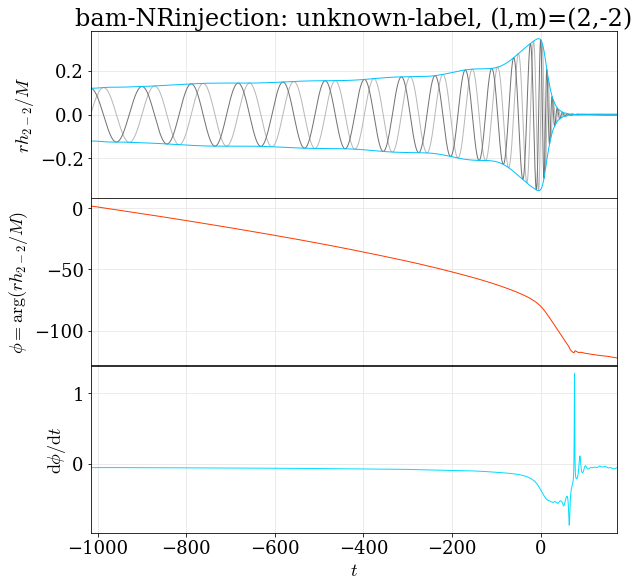

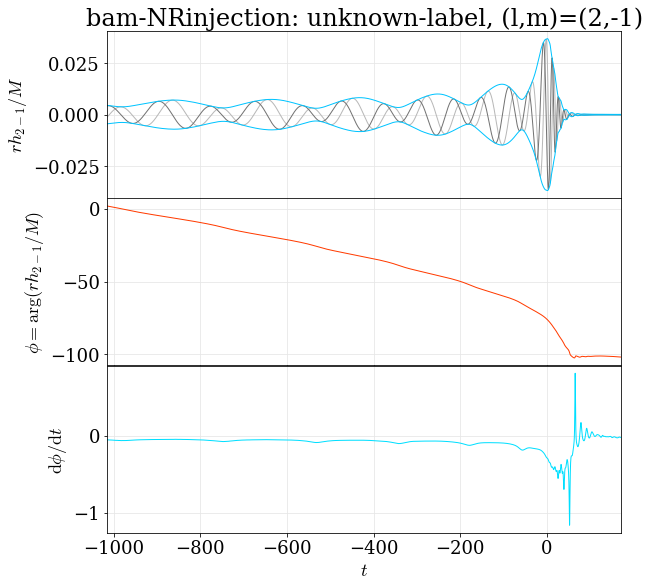

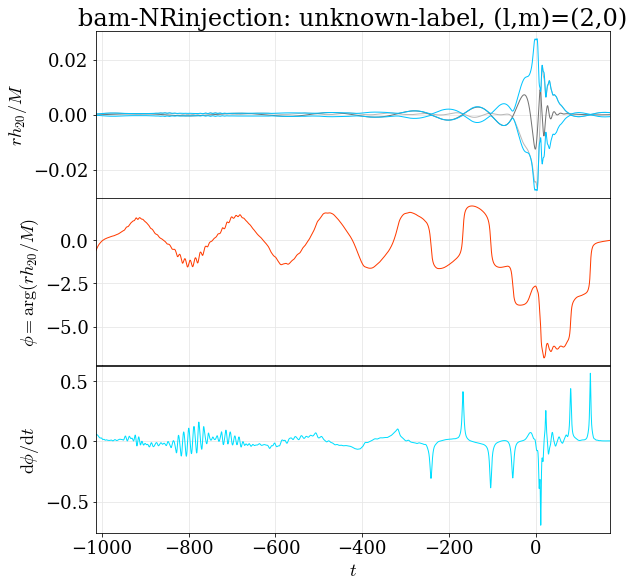

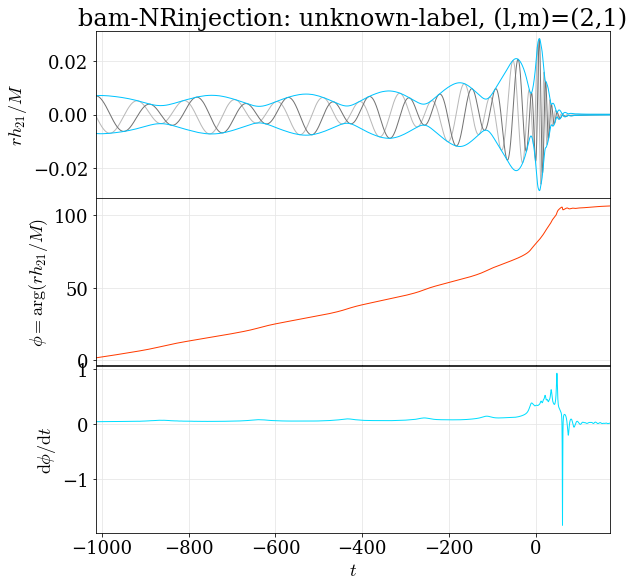

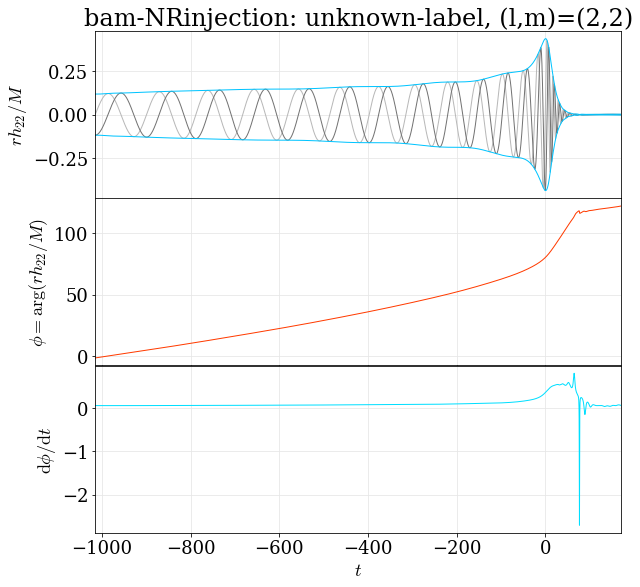

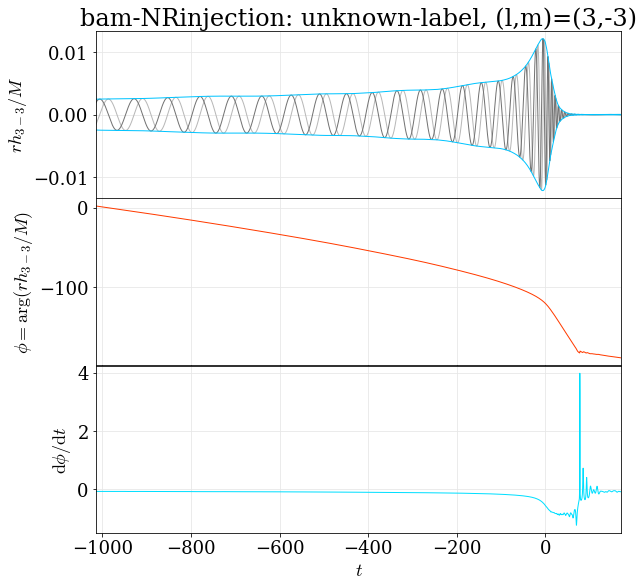

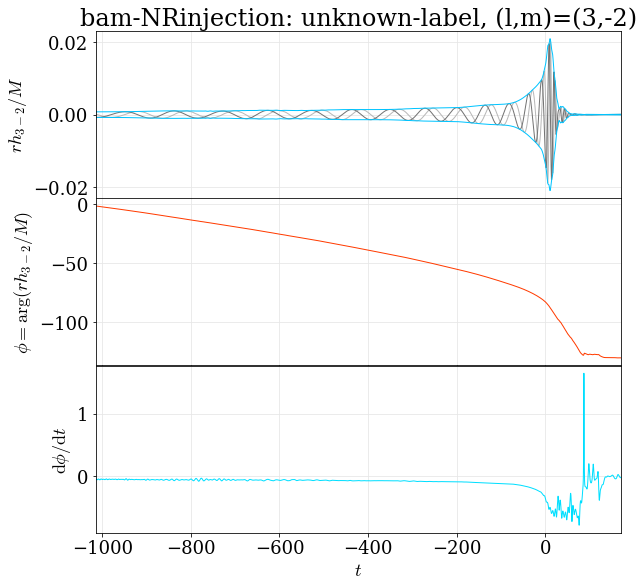

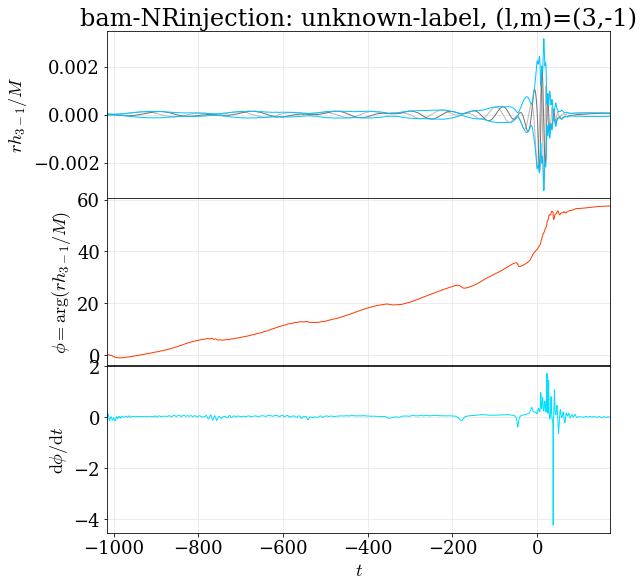

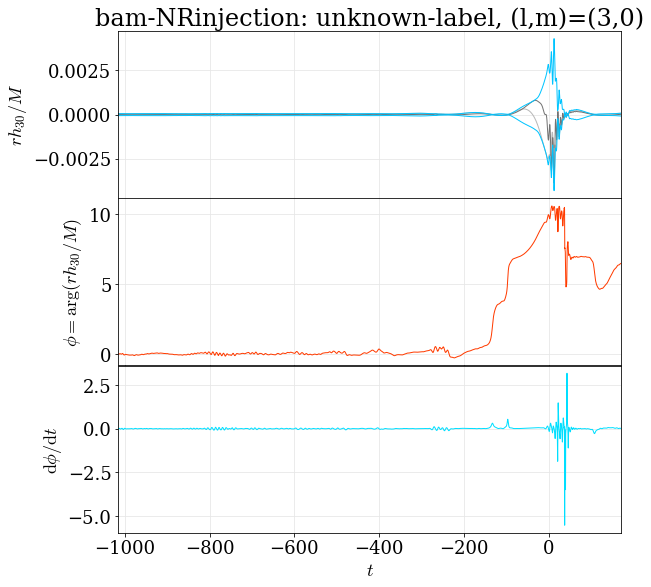

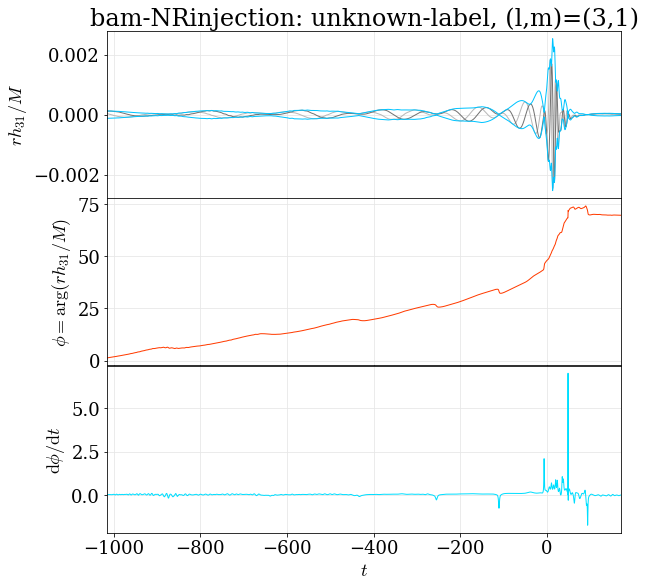

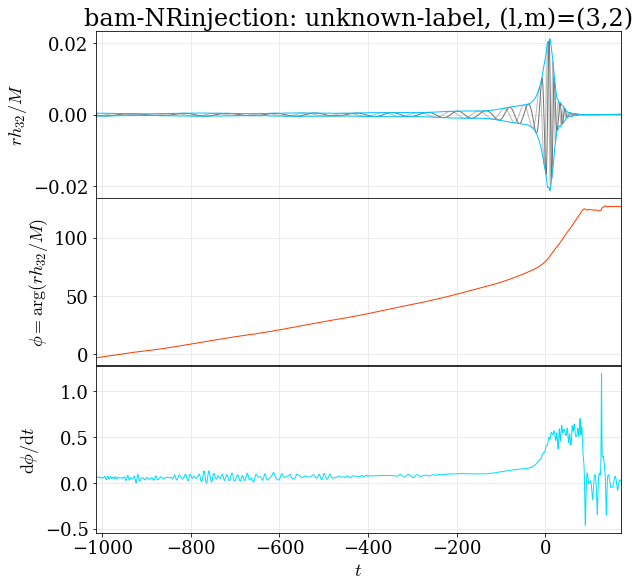

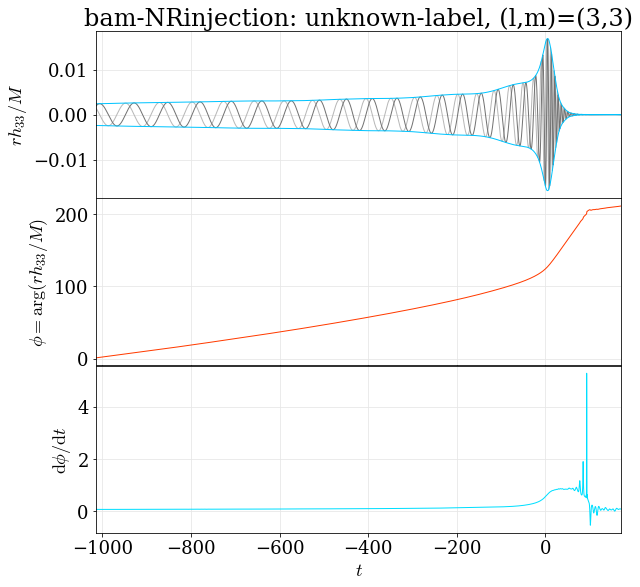

In [13]:
y.plot(kind='strain')

([<matplotlib.axes._subplots.AxesSubplot at 0x11c2fdc50>,
 <matplotlib.figure.Figure at 0x11be07550>)

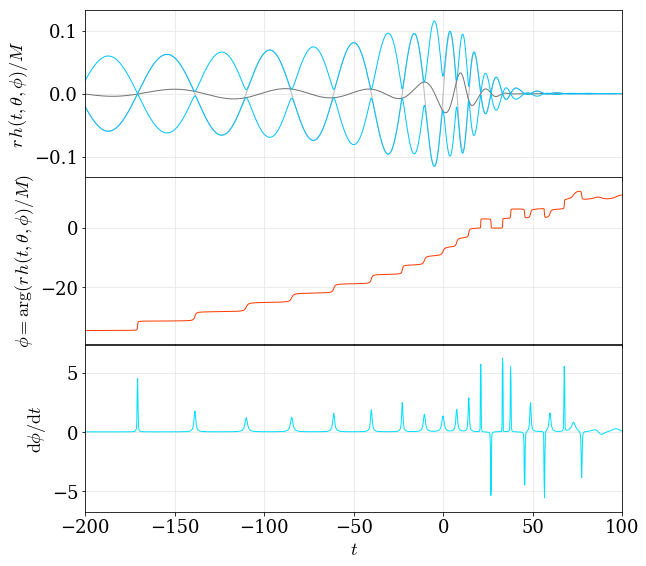

In [14]:
a = y.recompose(pi/2,0,kind='strain')
a.plot(tlim=[-200,100])

In [15]:

# 
M_Sol = 100
D_Mpc = 150
inclination = 1.83
fmin = 100
phi_ref = 0 # pi/3
#
M = M_Sol*MSUN_SI
Mf = Mf_Sol*MSUN_SI
D = D_Mpc*1.0e6*PC_SI
#
t_code = y.lm[2,2]['strain'].t
deltaT = physt( diff(t_code)[0], M_Sol )
t = physt( t_code, M_Sol )
xf = y.xf
eta = y.eta
#
df = physf( y.lm[2,2]['strain'].df, M_Sol )
code_f = y.lm[2,2]['strain'].f
f  = physf( code_f, M_Sol )

#
fmin,fmax=30.0,1500.0
fmask = (f>=fmin) & (f<=fmax)

#
def signal_wfarr_fun( THETA,PHI,LM=None) : 
    ans = physhf( yrd.recompose( THETA,PHI,kind='strain',domain='freq').fd_wfarr[fmask,:], M_Sol, D_Mpc ) 
    return ans

#
def template_wfarr_fun( THETA,PHI,LM=None):
    # Import useful things 
    from numpy.fft import fft,fftshift
    # Evaluate LAL model in time domain
    hlal_raw = lalsim.SimRingdownMMRDNS_time(0.0,deltaT,len(t_code),Mf,xf,eta,THETA,PHI,D,nonGRparams=None)
    hp = hlal_raw[0].data.data
    hc = hlal_raw[1].data.data
    # Convert to frequency domain
    #hfp = fftshift( fft( hp ) )
    #hfc = fftshift( fft( hc ) )
    hfp = deltaT * fftshift( fft( hp ) )
    hfc = deltaT * fftshift( fft( hc ) )
    # Construct answer 
    f_ = physf( yrd.lm[2,2]['strain'].f, M_Sol )
    ans = array( [ f_, hfp, hfc ] ).T[fmask,:]
    # Return answer
    return ans

NameError: name 'Mf_Sol' is not defined